# ML assignment

**Authors:**
- Oleh Pomazan oleh.pomazan@ue-germany.de 31566448
- Iryna Tyshchenko iryna.tyshchenko@ue-germany.de 45983811
- Vitalii Tsiapa vitalii.tsiapa@ue-germany.de 37864347

 Original paper link: https://www.sciencedirect.com/science/article/pii/S2352484720313007#b13

In [1]:
GOOGLE_COLAB = False
PROJECT_ROOT_DIR = '.'

if GOOGLE_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

  import sys
  PROJECT_ROOT_DIR = '/content/drive/MyDrive/Colab Notebooks/ml_assignment'
  sys.path.insert(0, PROJECT_ROOT_DIR)


# Feature extraction from audio

In [2]:
import numpy as np
from features import read_features_from_csv, extract_features_from_urban8k_dataset

# uncomment to extract features to csv file
#extract_features_from_urban8k_dataset(pickle=False, project_root_dir=PROJECT_ROOT_DIR)

train_frame, test_frame, x_train, x_test, y_train, y_test = read_features_from_csv(path_to_csv=f'{PROJECT_ROOT_DIR}/data/extracted_features.csv')

In [3]:
train_frame

,Unnamed: 0,path,class,class_id,features
8450,8450,input/audio/fold1/193698-2-0-58.wav,children_playing,2,"[-319.29752, 102.58311, -49.749527, 7.117446, ..."
8585,8585,input/audio/fold1/118279-8-0-4.wav,siren,8,"[-279.48712, 112.4627, -27.210625, 27.530556, ..."
2404,2404,input/audio/fold7/83488-1-0-0.wav,car_horn,1,"[-176.89964, -65.4562, -2.5445695, 52.369923, ..."
4477,4477,input/audio/fold5/196062-2-0-0.wav,children_playing,2,"[-281.53714, 43.722984, -21.65799, 24.144136, ..."
6173,6173,input/audio/fold2/102871-8-0-13.wav,siren,8,"[-276.41293, 153.79091, -51.535614, -6.9765244..."
...,...,...,...,...,...
5734,5734,input/audio/fold6/63724-0-0-9.wav,air_conditioner,0,"[-353.99768, 120.82677, -25.244507, 34.66291, ..."
5191,5191,input/audio/fold5/178686-0-0-53.wav,air_conditioner,0,"[-377.1148, 169.02785, -28.958954, 31.370935, ..."
5390,5390,input/audio/fold6/39852-5-0-1.wav,engine_idling,5,"[-0.2182836, 156.47552, -29.636814, 39.782234,..."
860,860,input/audio/fold4/24347-8-0-51.wav,siren,8,"[-128.50357, 166.96239, -68.697365, -8.287582,..."


In [4]:
test_frame

,Unnamed: 0,path,class,class_id,features
6770,6770,input/audio/fold2/203128-3-6-0.wav,dog_bark,3,"[-245.69205, 104.1259, -40.40444, -33.80086, -..."
3534,3534,input/audio/fold9/101729-0-0-23.wav,air_conditioner,0,"[-247.12012, 43.795162, 33.967854, 24.374525, ..."
8556,8556,input/audio/fold1/177621-0-0-0.wav,air_conditioner,0,"[-223.05162, 114.45852, 29.96794, 1.3511316, 7..."
7870,7870,input/audio/fold1/157867-8-0-22.wav,siren,8,"[-308.7529, 60.80618, -32.960495, -8.78716, -5..."
1226,1226,input/audio/fold3/176783-3-0-3.wav,dog_bark,3,"[-487.41376, 134.71155, -57.171463, 28.707848,..."
...,...,...,...,...,...
73,73,input/audio/fold4/159752-8-2-1.wav,siren,8,"[-411.13675, 218.53635, 5.624176, 17.057047, 2..."
1794,1794,input/audio/fold3/199769-1-0-0.wav,car_horn,1,"[-212.01712, 116.12175, -7.3977575, 20.432745,..."
3202,3202,input/audio/fold9/62567-5-0-2.wav,engine_idling,5,"[-297.126, 174.29768, 38.8224, 32.795914, 22.1..."
2221,2221,input/audio/fold7/84143-2-0-7.wav,children_playing,2,"[-146.49277, 130.51808, -46.111217, 12.337456,..."


In [5]:
print(f"x_train.shape={x_train.shape}")
print(f"x_test.shape={x_test.shape}")

print(f"y_train.shape={y_train.shape}")
print(f"y_test.shape={y_test.shape}")

x_train.shape=(6985, 43)
x_test.shape=(1747, 43)
y_train.shape=(6985,)
y_test.shape=(1747,)


In [54]:
scores = []

# Scale features

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("Scaled training data:")
print(x_train_scaled)

print("Scaled testing data:")
print(x_test_scaled)

Scaled training data:
[[-0.72502944 -0.07619587 -0.9320873  ... -0.91368314 -0.00464292
   0.07203689]
 [-0.42147087  0.12142765 -0.22834883 ... -0.82770062 -0.15372364
  -0.24713886]
 [ 0.36076969 -3.4375217   0.54180636 ...  2.41084806  1.72006478
   1.4680661 ]
 ...
 [ 1.70798401  1.0018254  -0.30410241 ...  4.47063976 -0.54882009
  -0.61037078]
 [ 0.72979492  1.21159647 -1.52370097 ...  1.08770396 -0.75518186
  -0.30388918]
 [-0.57845795  0.89565495  1.46877863 ... -0.32434158 -1.24623663
  -1.03038289]]
Scaled testing data:
[[-0.16377983 -0.04533512 -0.64030302 ...  0.57213331 -0.30655716
  -0.31510775]
 [-0.17466901 -1.25214362  1.68184402 ...  0.21949965  1.84192853
   1.14876968]
 [ 0.00885588  0.16135046  1.55695358 ... -0.58584184  0.47413243
   0.10304048]
 ...
 [-0.55596922  1.35832583  1.83341887 ...  1.03117182 -1.63420484
  -1.15018581]
 [ 0.59262534  0.48259324 -0.81848733 ... -0.17350123 -0.31527217
  -0.17942677]
 [ 1.50824914 -2.34093638  0.84686882 ...  1.15045164  

# Accuracies function

In [8]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

def acc(y_test, y_predict):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_predict)

    # Compute recall, precision, and F1-score
    recall = np.diag(cm) / np.sum(cm, axis=1)
    precision = np.diag(cm) / np.sum(cm, axis=0)
    f1 = 2 * (precision * recall) / (precision + recall)

    # Print recall and precision
    print('Recall:', recall)
    print('Precision:', precision)

    # Print classification report
    print('\nClassification Report:\n', classification_report(y_test, y_predict))

    # Print confusion matrix
    print('\nConfusion Matrix:\n', cm)

    # Plot confusion matrix heatmap
    ax = sns.heatmap(cm, linewidths=0.5, cmap="YlGnBu")


# K-neighbors classifier from sklearn library

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'chebyshev', 'cosine']
}

model_knn_sklearn = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1)
model_knn_sklearn.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'chebyshev', 'cosine'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']})

In [10]:
model_knn_sklearn.best_params_

{'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}

Model Score: 0.9484831139095592
Recall: [1.         0.91860465 0.93137255 0.87368421 0.95260664 0.98029557
 0.92753623 0.97814208 0.98895028 0.90291262]
Precision: [0.96396396 0.96341463 0.92682927 0.93785311 0.95714286 0.98029557
 0.79012346 0.94708995 0.97282609 0.95876289]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       214
           1       0.96      0.92      0.94        86
           2       0.93      0.93      0.93       204
           3       0.94      0.87      0.90       190
           4       0.96      0.95      0.95       211
           5       0.98      0.98      0.98       203
           6       0.79      0.93      0.85        69
           7       0.95      0.98      0.96       183
           8       0.97      0.99      0.98       181
           9       0.96      0.90      0.93       206

    accuracy                           0.95      1747
   macro avg       0.94      0.95      0.94     

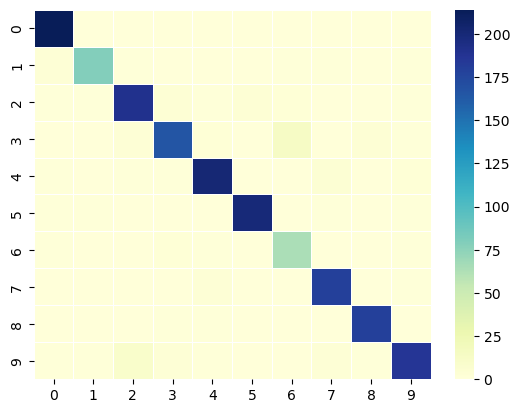

In [55]:
knn_sc_score = model_knn_sklearn.score(x_test_scaled, y_test)
print(f'Model Score: {knn_sc_score}')

y_predict = model_knn_sklearn.predict(x_test_scaled)

acc(y_test,y_predict)

scores.append({"model": "KNN (scikit-learn)", "score": knn_sc_score})

# K-neighbors classifier implementation based on Numpy

In [11]:
from knn import KNN

grid_params = {
    'n_neighbors': [3, 5], # narrow down search space due to time limitations
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'chebyshev', 'cosine']
}

model_knn_numpy = GridSearchCV(KNN(), grid_params, cv=5, n_jobs=-1)
model_knn_numpy.fit(x_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNN(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'chebyshev', 'cosine'],
                         'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']})

In [12]:
model_knn_numpy.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

Model Score: 0.9341728677733258
Recall: [1.         0.87209302 0.98039216 0.77894737 0.91469194 0.98522167
 0.94202899 0.97814208 0.97790055 0.87864078]
Precision: [0.95111111 0.98684211 0.83682008 0.94871795 0.965      0.98039216
 0.79268293 0.94708995 0.97252747 0.93298969]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       214
           1       0.99      0.87      0.93        86
           2       0.84      0.98      0.90       204
           3       0.95      0.78      0.86       190
           4       0.96      0.91      0.94       211
           5       0.98      0.99      0.98       203
           6       0.79      0.94      0.86        69
           7       0.95      0.98      0.96       183
           8       0.97      0.98      0.98       181
           9       0.93      0.88      0.91       206

    accuracy                           0.93      1747
   macro avg       0.93      0.93      0.93     

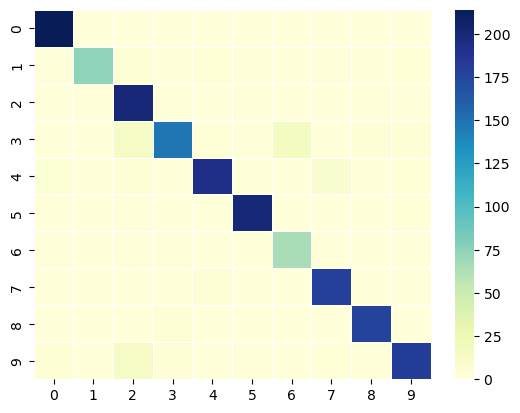

In [56]:
knn_score = model_knn_numpy.score(x_test_scaled, y_test)
print(f'Model Score: {knn_score}')

y_predict = model_knn_numpy.predict(x_test_scaled)
acc(y_test,y_predict)

scores.append({"model": "KNN (numpy)", "score": knn_score})

# Decision trees approach

In [13]:
from sklearn.tree import DecisionTreeClassifier
from features import RANDOM_STATE

grid_params = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

tree_classifier = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), grid_params, cv=5, n_jobs=-1)
tree_classifier.fit(x_train_scaled, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 7, 10]})

In [14]:
tree_classifier.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [15]:
tree_classifier.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Model Score: 0.7040641099026903
Recall: [0.8317757  0.60465116 0.58823529 0.62105263 0.7535545  0.84236453
 0.55072464 0.74863388 0.80662983 0.53883495]
Precision: [0.83962264 0.67532468 0.58252427 0.61780105 0.72272727 0.81818182
 0.49350649 0.77840909 0.82485876 0.54950495]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       214
           1       0.68      0.60      0.64        86
           2       0.58      0.59      0.59       204
           3       0.62      0.62      0.62       190
           4       0.72      0.75      0.74       211
           5       0.82      0.84      0.83       203
           6       0.49      0.55      0.52        69
           7       0.78      0.75      0.76       183
           8       0.82      0.81      0.82       181
           9       0.55      0.54      0.54       206

    accuracy                           0.70      1747
   macro avg       0.69      0.69      0.69     

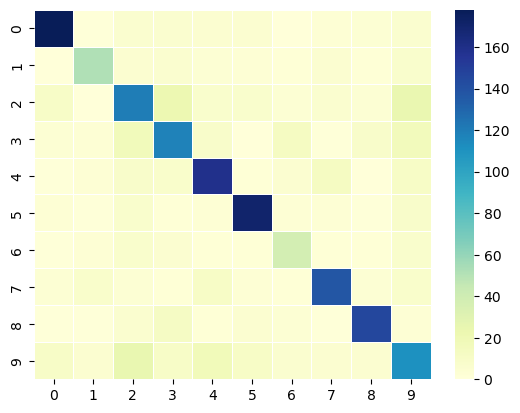

In [57]:
# accuracy on train data
dt_score = tree_classifier.score(x_test_scaled, y_test)
print(f'Model Score: {dt_score}')

y_predict = tree_classifier.predict(x_test_scaled)
acc(y_test,y_predict)

scores.append({"model": "Decision tree", "score": dt_score})

# Random forest classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

grid_params = {
    "n_estimators": [10, 50, 100]
}

random_forest_classifier = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), grid_params, cv=5, n_jobs=-1)
random_forest_classifier.fit(x_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100]})

In [46]:
random_forest_classifier.best_params_

{'n_estimators': 100}

Model Score: 0.9124212936462507
Recall: [0.98598131 0.84883721 0.91666667 0.85789474 0.8957346  0.96551724
 0.76811594 0.97814208 0.9558011  0.82524272]
Precision: [0.99528302 0.96052632 0.80603448 0.88108108 0.92195122 0.98492462
 0.98148148 0.8817734  0.96111111 0.84577114]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       214
           1       0.96      0.85      0.90        86
           2       0.81      0.92      0.86       204
           3       0.88      0.86      0.87       190
           4       0.92      0.90      0.91       211
           5       0.98      0.97      0.98       203
           6       0.98      0.77      0.86        69
           7       0.88      0.98      0.93       183
           8       0.96      0.96      0.96       181
           9       0.85      0.83      0.84       206

    accuracy                           0.91      1747
   macro avg       0.92      0.90      0.91     

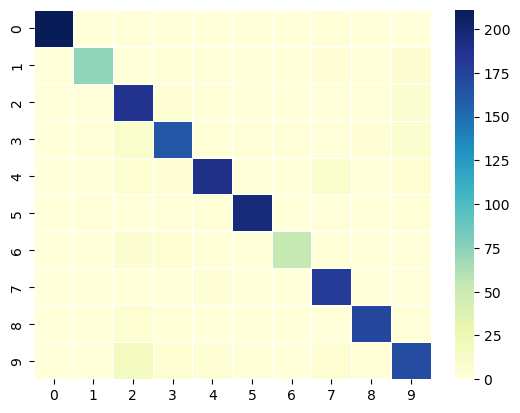

In [58]:
rf_score = random_forest_classifier.score(x_test_scaled, y_test)
print(f'Model Score: {rf_score}')
y_predict = random_forest_classifier.predict(x_test_scaled)
acc(y_test,y_predict)

scores.append({"model": "Random forest", "score": rf_score})

# XGBoost

In [18]:
from xgboost import XGBClassifier

grid_params_xgb = {
    'learning_rate': [0.1],
    'n_estimators': [400],
    'max_depth': [8],
    'objective': ['multi:softmax'],
    'nthread': [4]
}

model_xgb = GridSearchCV(XGBClassifier(), grid_params_xgb, cv=5, n_jobs=-1)
model_xgb.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'n_estimators': [400], 'nthread': [4],
                         'objective': ['multi:softmax']})

Best parameters

In [19]:
model_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 400,
 'nthread': 4,
 'objective': 'multi:softmax'}

Model Score: 0.9170005724098454
Recall: [0.97663551 0.84883721 0.89705882 0.89473684 0.86729858 0.96551724
 0.86956522 0.9726776  0.96132597 0.85436893]
Precision: [0.9587156  0.93589744 0.87559809 0.88541667 0.92893401 0.97029703
 0.92307692 0.87684729 0.95081967 0.88      ]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       214
           1       0.94      0.85      0.89        86
           2       0.88      0.90      0.89       204
           3       0.89      0.89      0.89       190
           4       0.93      0.87      0.90       211
           5       0.97      0.97      0.97       203
           6       0.92      0.87      0.90        69
           7       0.88      0.97      0.92       183
           8       0.95      0.96      0.96       181
           9       0.88      0.85      0.87       206

    accuracy                           0.92      1747
   macro avg       0.92      0.91      0.91     

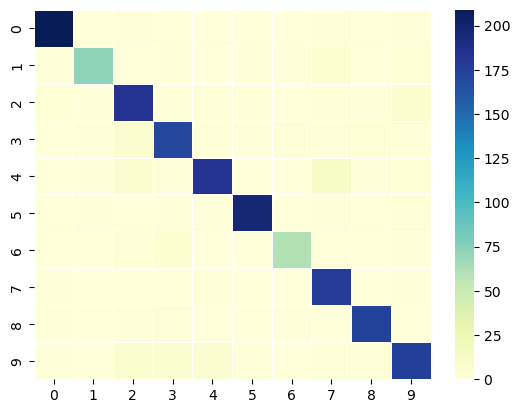

In [59]:
xgb_score = model_xgb.score(x_test_scaled, y_test)
print(f'Model Score: {xgb_score}')
y_predict = model_xgb.predict(x_test_scaled)
acc(y_test,y_predict)

scores.append({"model": "XGBoost", "score": xgb_score})


# CNN approach

Based on https://medium.com/@hasithsura/audio-classification-d37a82d6715

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
Using VGG11 model to classify spectrogram images.

In [22]:
import torch
import matplotlib.pyplot as plt

from dataset import get_dataset_loaders

train_loader, test_loader, train_dataset, test_dataset = get_dataset_loaders(pickle=True, project_dir=PROJECT_ROOT_DIR)


In [23]:
print(f"Spectrogram shape: {train_dataset[100][0].shape}")

Spectrogram shape: torch.Size([1, 64, 64])


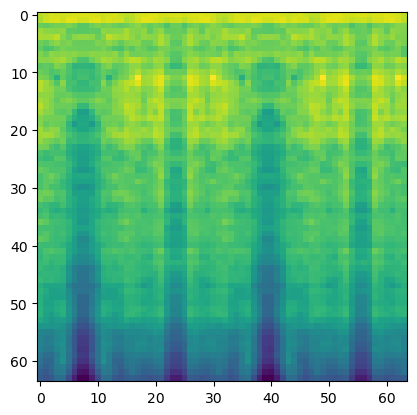

In [24]:
plt.imshow(train_dataset[100][0][0].numpy())

In [25]:
if torch.cuda.is_available():
    device=torch.device('cuda:0')
else:
    device=torch.device('cpu')

print(f"Device: {device}")

Device: cpu


In [32]:
from model import VGG11

load_pretrained = True

if not load_pretrained:
    from train import train_vgg11
    train_vgg11()

vgg11 = VGG11()
vgg11.load_state_dict(torch.load(f=f"{PROJECT_ROOT_DIR}/data/vgg.pth", map_location=device))
vgg11.to(device)



VGG11(
  (conv_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), paddin

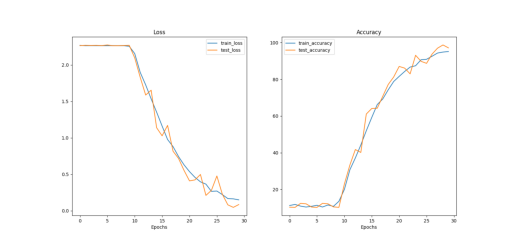

In [37]:
# training loss and accuracy plot
import matplotlib.image as mpimg
img = mpimg.imread(f"{PROJECT_ROOT_DIR}/data/metrics.png")
plt.axis('off')
plt.imshow(img)

Accuracy: 97.08070978820835
Recall: [1.         0.98969072 0.98333333 0.92857143 0.97814208 0.985
 1.         0.96728972 0.98496241 0.90960452]
Precision: [0.98324022 0.97959184 0.88059701 0.99411765 0.97282609 0.98994975
 0.98630137 0.99043062 0.98127341 0.96407186]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       176
           1       0.98      0.99      0.98        97
           2       0.88      0.98      0.93       180
           3       0.99      0.93      0.96       182
           4       0.97      0.98      0.98       183
           5       0.99      0.98      0.99       200
           6       0.99      1.00      0.99        72
           7       0.99      0.97      0.98       214
           8       0.98      0.98      0.98       266
           9       0.96      0.91      0.94       177

    accuracy                           0.97      1747
   macro avg       0.97      0.97      0.97      1747
wei

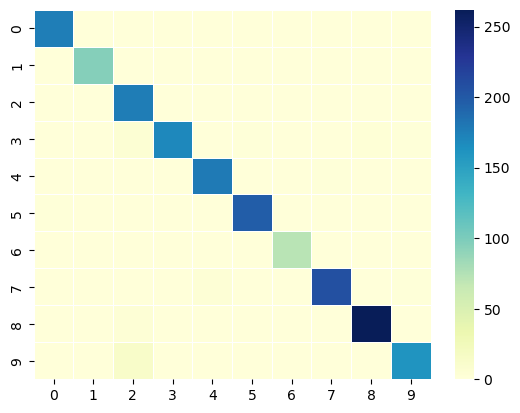

In [60]:
# confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
from train import accuracy_fn

vgg11.eval()

y_pred = []
y_true = []

with torch.inference_mode():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)

        test_pred = vgg11(X)
        test_pred = test_pred.argmax(dim=1).data.cpu().numpy() # logits -> labels
        # print(test_pred)

        y_pred.extend(test_pred)

        labels = y.data.cpu().numpy()
        y_true.extend(labels)

vgg_score = accuracy_fn(y_true=torch.from_numpy(np.array(y_true)), y_pred=torch.from_numpy(np.array(y_pred)))
print(f'Accuracy: {vgg_score}')
acc(y_true,y_pred)

scores.append({"model": "VGG11", "score": vgg_score})


In [66]:
pd.DataFrame(scores)

,model,score
0,KNN (scikit-learn),0.948483
1,KNN (numpy),0.934173
2,Decision tree,0.704064
3,Random forest,0.912421
4,XGBoost,0.917001
5,VGG11,0.970807


# Inference for a single audio file for each model


In [35]:
from features import AudioFeatureExtractor
from dataset import transfrom, BATCH_SIZE
from IPython.display import Audio

labels = [
    'air_conditioner',
    'car_horn',
    'children_playing',
    'dog_bark',
    'drilling',
    'engine_idling',
    'gun_shot',
    'jackhammer',
    'siren',
    'street_music',
]

def classify_audio(path_to_audio=f'{PROJECT_ROOT_DIR}/input/audio/fold4/344-3-1-0.wav'):
    feature_extractor = AudioFeatureExtractor()

    (features, spectrogram) = feature_extractor.extract_features(path_to_audio=path_to_audio)
    features = np.array(features).reshape(1, -1)

    features_scaled = scaler.transform(features)

    y_pred = model_knn_sklearn.predict(features_scaled)
    print(f'KNN (sklearn): {labels[y_pred[0]]}')

    y_pred = model_knn_numpy.predict(features_scaled)
    print(f'KNN (numpy): {labels[y_pred[0]]}')

    y_pred = tree_classifier.predict(features_scaled)
    print(f'Decision tree: {labels[y_pred[0]]}')

    # create a batch
    X = transfrom(spectrogram)
    X = X.repeat(BATCH_SIZE, 1, 1, 1)
    y_pred = vgg11(X.to(device))
    y_pred = y_pred[0].argmax()
    print(f"VGG11: {labels[y_pred]}")


path_to_audio = f'{PROJECT_ROOT_DIR}/input/audio/fold4/344-3-1-0.wav'
classify_audio(path_to_audio)

Audio(path_to_audio)



KNN (sklearn): dog_bark
KNN (numpy): dog_bark
Decision tree: dog_bark
VGG11: dog_bark


Data Set

In [38]:
import pandas as pd
from tabulate import tabulate

# Load the metadata file of UrbanSound8K dataset
metadata_path = f'{PROJECT_ROOT_DIR}/input/metadata/UrbanSound8K.csv'
metadata = pd.read_csv(metadata_path)

# Count instances in each fold
fold_counts = metadata['fold'].value_counts().sort_index()

# Prepare data for tabular printing
table_data = []
for fold, count in fold_counts.items():
    table_data.append([fold, count])

# Print as table
table_headers = ['Fold', 'Number of Instances']
table = tabulate(table_data, headers=table_headers, tablefmt='grid')
print(table)


+--------+-----------------------+
|   Fold |   Number of Instances |
+========+=======================+
|      1 |                   873 |
+--------+-----------------------+
|      2 |                   888 |
+--------+-----------------------+
|      3 |                   925 |
+--------+-----------------------+
|      4 |                   990 |
+--------+-----------------------+
|      5 |                   936 |
+--------+-----------------------+
|      6 |                   823 |
+--------+-----------------------+
|      7 |                   838 |
+--------+-----------------------+
|      8 |                   806 |
+--------+-----------------------+
|      9 |                   816 |
+--------+-----------------------+
|     10 |                   837 |
+--------+-----------------------+


In [8]:
# Count samples for each class
class_counts = metadata['classID'].value_counts().sort_index()

# Prepare data for tabular printing
table_data = []
for class_id, count in class_counts.items():
    class_name = metadata.loc[metadata['classID'] == class_id, 'class'].iloc[0]
    table_data.append([class_name, class_id, count])

# Print as table
table_headers = ['Class Name', 'Class ID', 'Number of Samples']
table = tabulate(table_data, headers=table_headers, tablefmt='grid')
print(table)

+------------------+------------+---------------------+
| Class Name       |   Class ID |   Number of Samples |
+==================+============+=====================+
| air_conditioner  |          0 |                1000 |
+------------------+------------+---------------------+
| car_horn         |          1 |                 429 |
+------------------+------------+---------------------+
| children_playing |          2 |                1000 |
+------------------+------------+---------------------+
| dog_bark         |          3 |                1000 |
+------------------+------------+---------------------+
| drilling         |          4 |                1000 |
+------------------+------------+---------------------+
| engine_idling    |          5 |                1000 |
+------------------+------------+---------------------+
| gun_shot         |          6 |                 374 |
+------------------+------------+---------------------+
| jackhammer       |          7 |               

Waveform

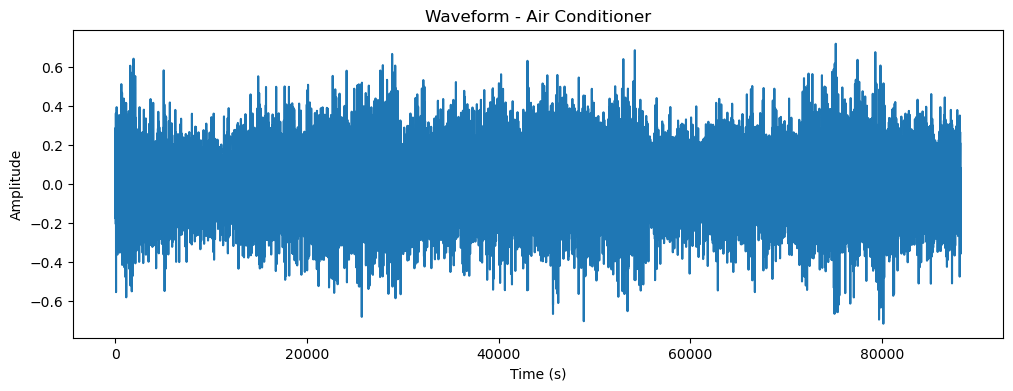

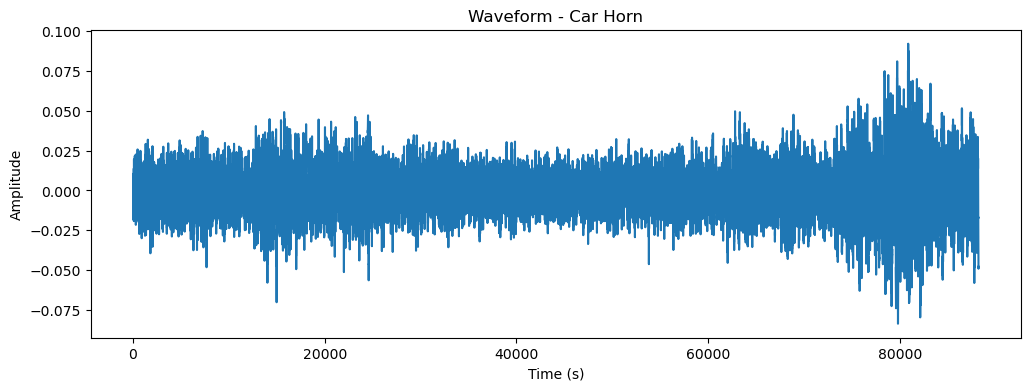

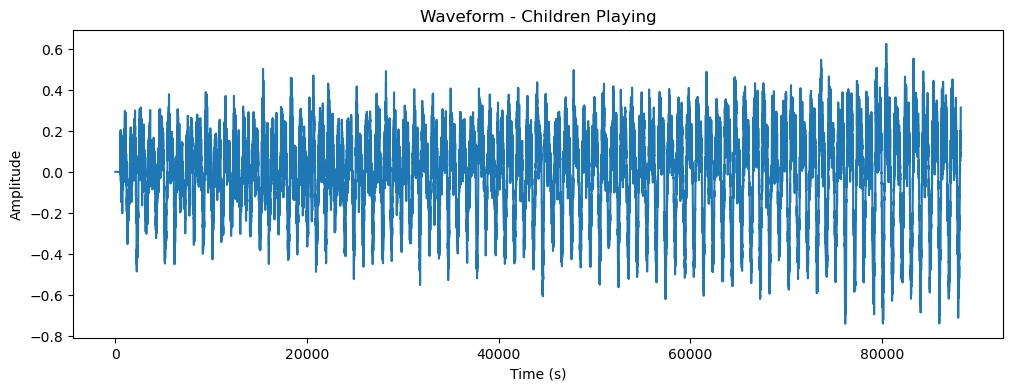

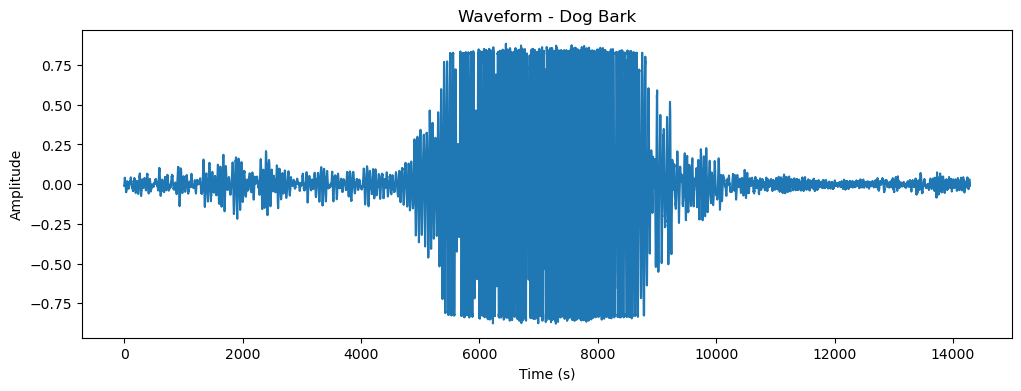

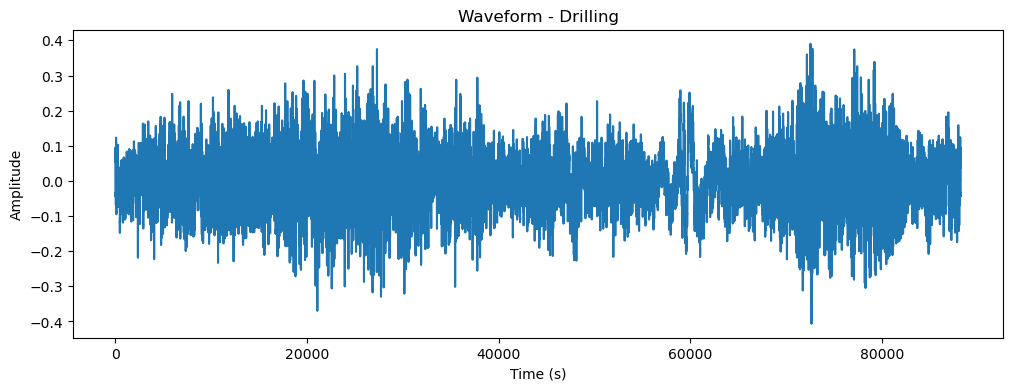

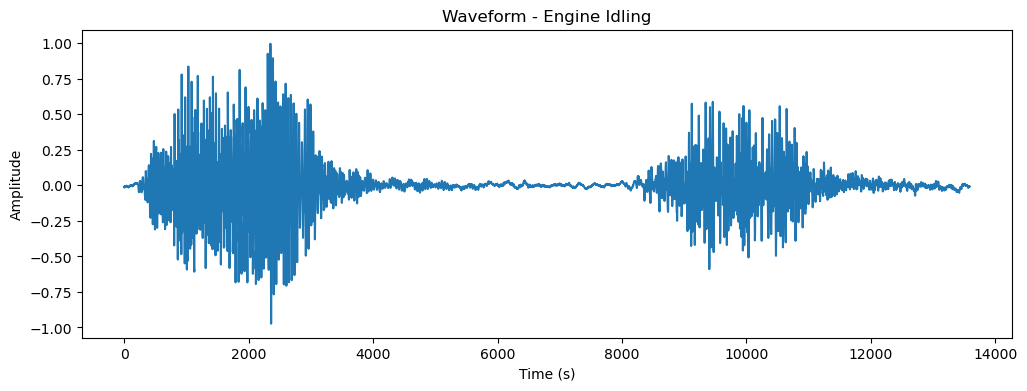

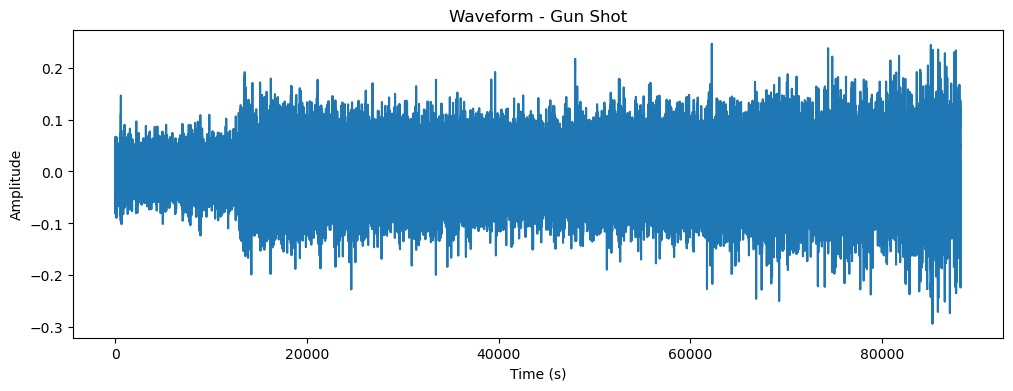

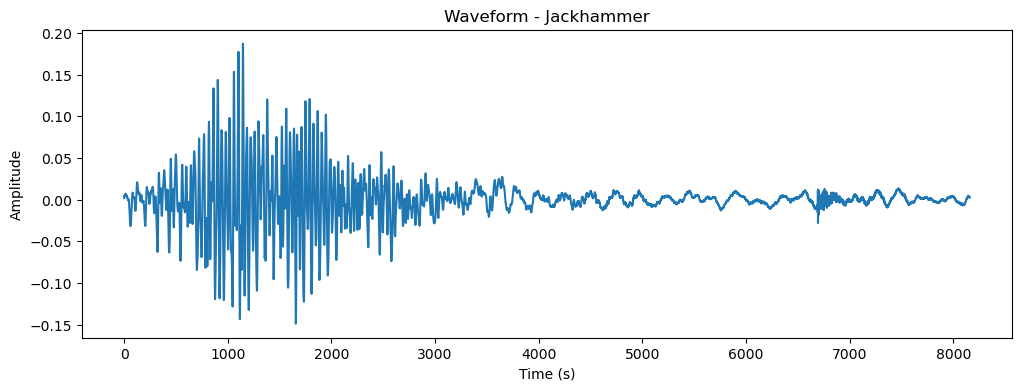

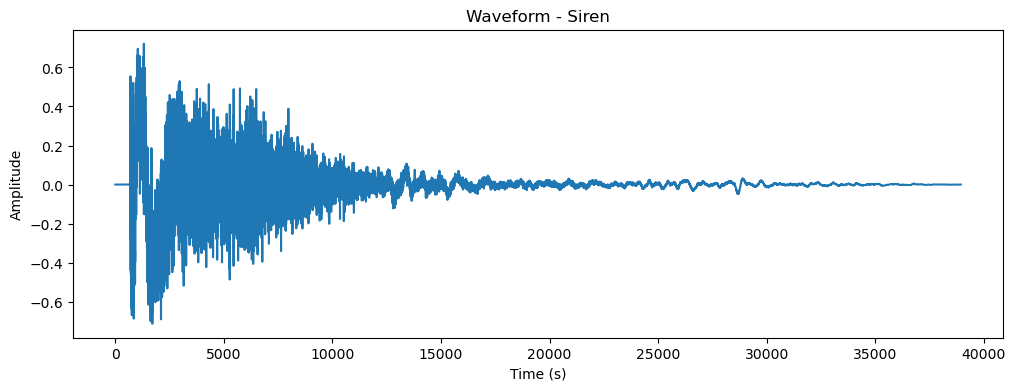

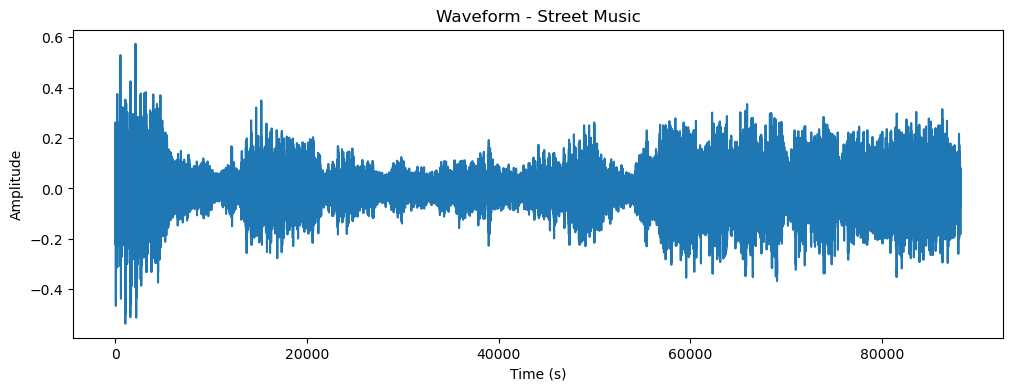

In [39]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Dictionary of sound types and their corresponding audio files
sound_types = {
    'Air Conditioner': f'{PROJECT_ROOT_DIR}/input/audio/fold1/99180-9-0-48.wav',
    'Car Horn': f'{PROJECT_ROOT_DIR}/input/audio/fold2/123688-8-2-2.wav',
    'Children Playing': f'{PROJECT_ROOT_DIR}/input/audio/fold3/6988-5-0-0.wav',
    'Dog Bark': f'{PROJECT_ROOT_DIR}/input/audio/fold4/344-3-0-0.wav',
    'Drilling': f'{PROJECT_ROOT_DIR}/input/audio/fold5/6508-9-0-1.wav',
    'Engine Idling': f'{PROJECT_ROOT_DIR}/input/audio/fold6/4910-3-0-0.wav',
    'Gun Shot': f'{PROJECT_ROOT_DIR}/input/audio/fold7/518-4-0-0.wav',
    'Jackhammer': f'{PROJECT_ROOT_DIR}/input/audio/fold8/4918-3-0-0.wav',
    'Siren': f'{PROJECT_ROOT_DIR}/input/audio/fold9/7063-6-0-0.wav',
    'Street Music': f'{PROJECT_ROOT_DIR}/input/audio/fold10/99192-4-0-53.wav'
}

# Iterate over sound types and plot waveform for each
for sound_name, audio_file in sound_types.items():
    # Load the audio file
    audio, sr = librosa.load(audio_file)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    plt.plot(audio)
    plt.title('Waveform - {}'.format(sound_name))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


Spectrograms

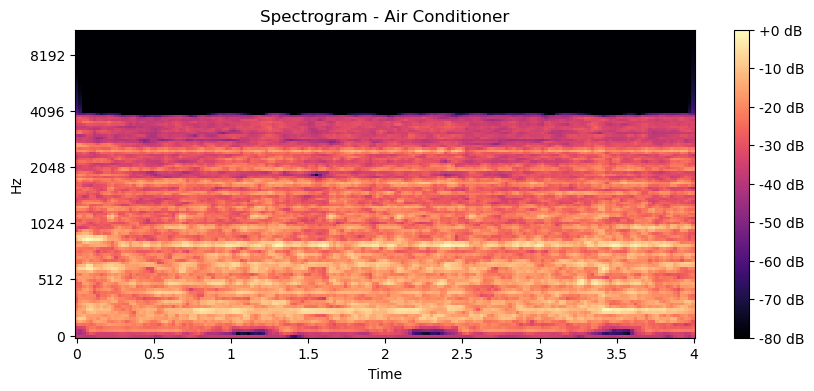

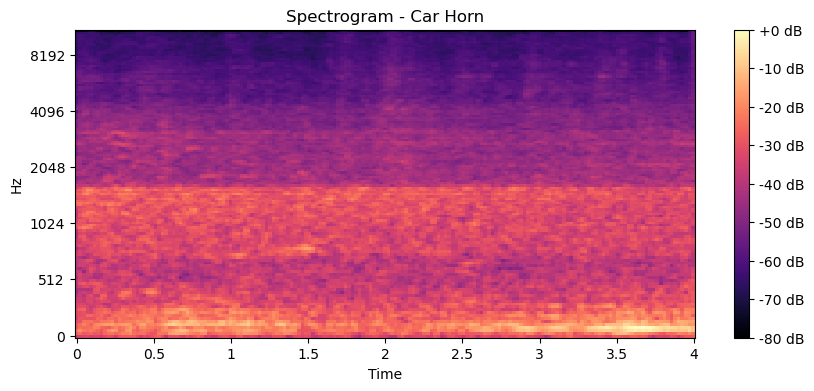

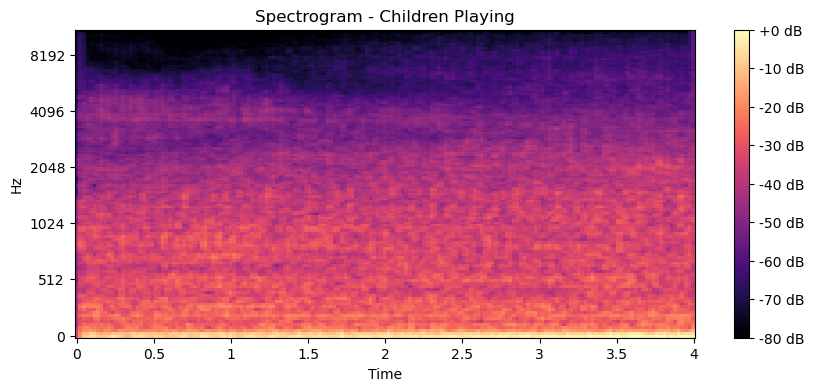

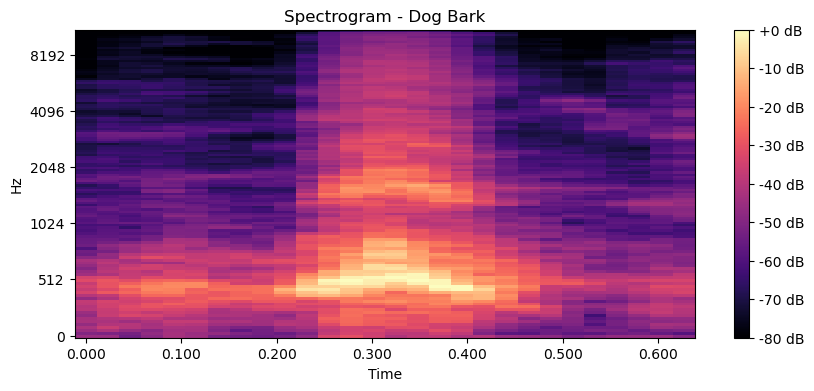

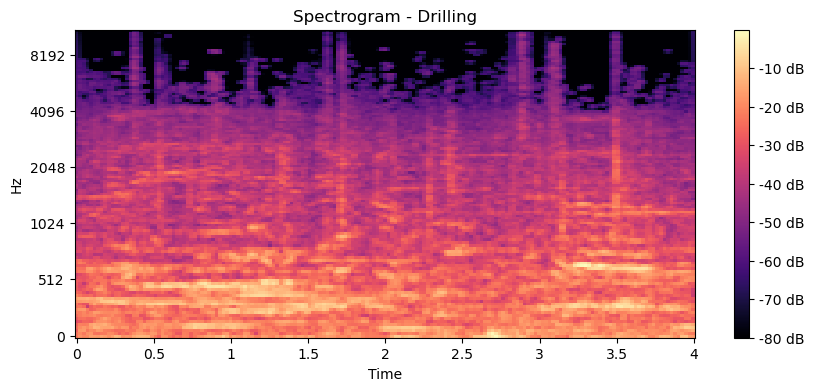

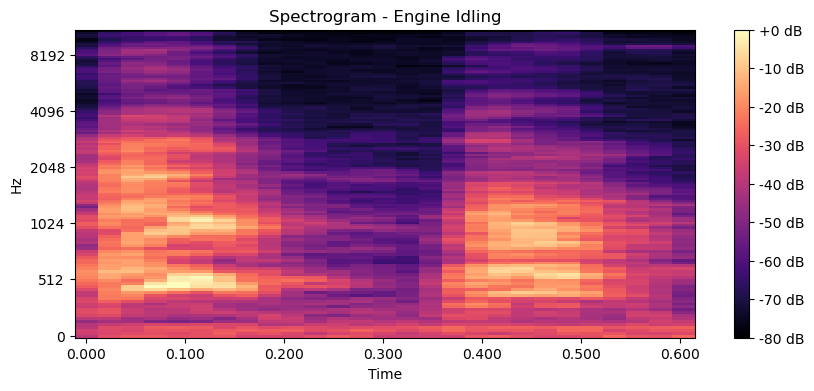

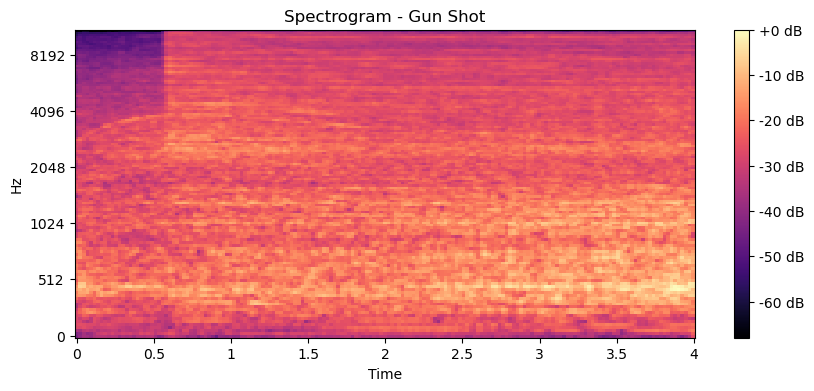

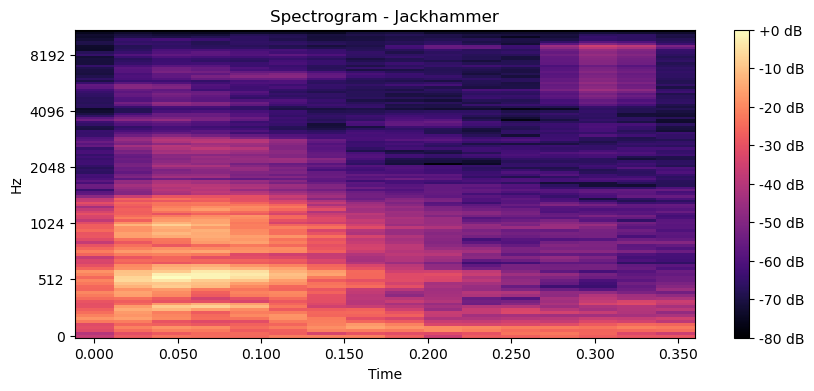

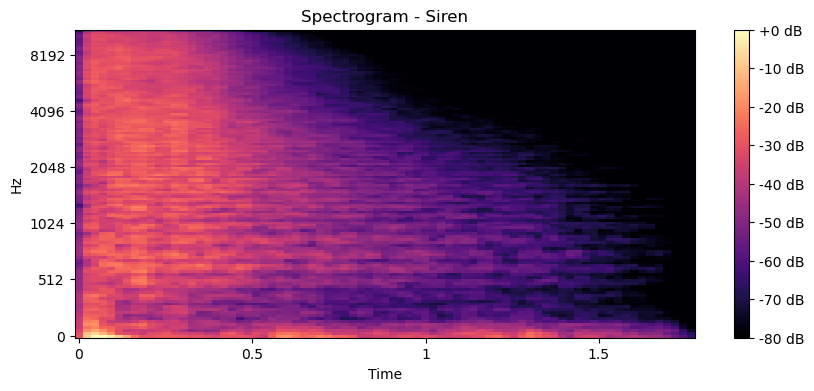

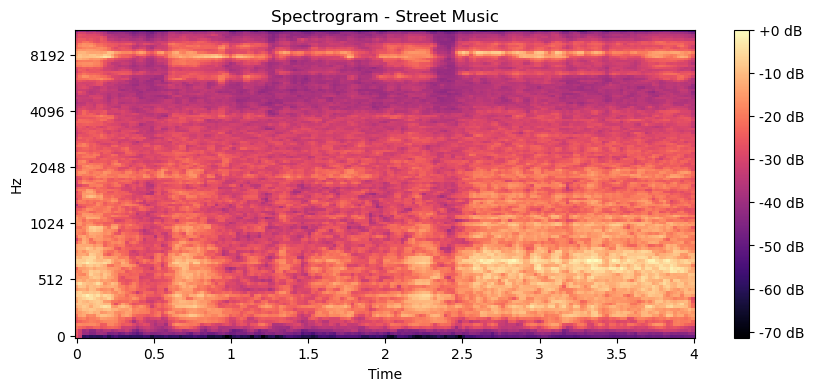

In [40]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Dictionary of sound types and their corresponding audio files
sound_types = {
    'Air Conditioner': f'{PROJECT_ROOT_DIR}/input/audio/fold1/99180-9-0-48.wav',
    'Car Horn': f'{PROJECT_ROOT_DIR}/input/audio/fold2/123688-8-2-2.wav',
    'Children Playing': f'{PROJECT_ROOT_DIR}/input/audio/fold3/6988-5-0-0.wav',
    'Dog Bark': f'{PROJECT_ROOT_DIR}/input/audio/fold4/344-3-0-0.wav',
    'Drilling': f'{PROJECT_ROOT_DIR}/input/audio/fold5/6508-9-0-1.wav',
    'Engine Idling': f'{PROJECT_ROOT_DIR}/input/audio/fold6/4910-3-0-0.wav',
    'Gun Shot': f'{PROJECT_ROOT_DIR}/input/audio/fold7/518-4-0-0.wav',
    'Jackhammer': f'{PROJECT_ROOT_DIR}/input/audio/fold8/4918-3-0-0.wav',
    'Siren': f'{PROJECT_ROOT_DIR}/input/audio/fold9/7063-6-0-0.wav',
    'Street Music': f'{PROJECT_ROOT_DIR}/input/audio/fold10/99192-4-0-53.wav'
}

# Iterate over sound types and plot spectrogram for each
for sound_name, audio_file in sound_types.items():
    # Load the audio file
    audio, sr = librosa.load(audio_file)

    # Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram - {}'.format(sound_name))
    plt.show()


# Mell-Frequency Coeficients

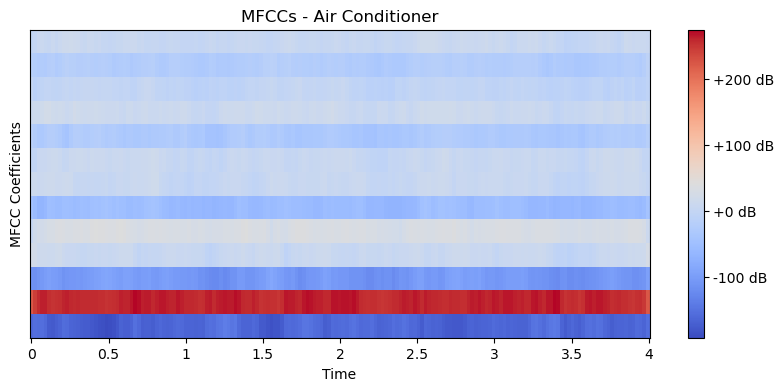

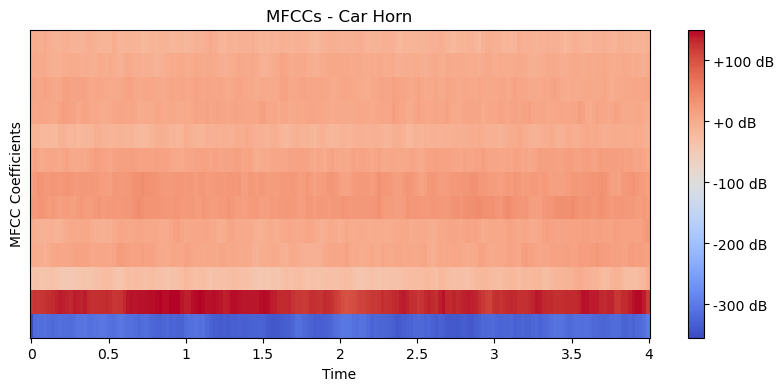

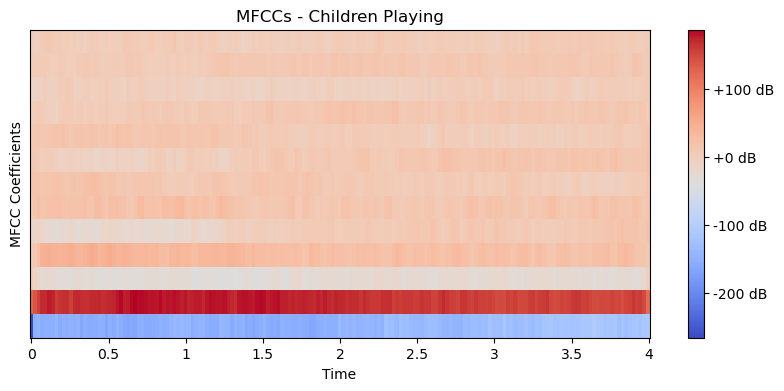

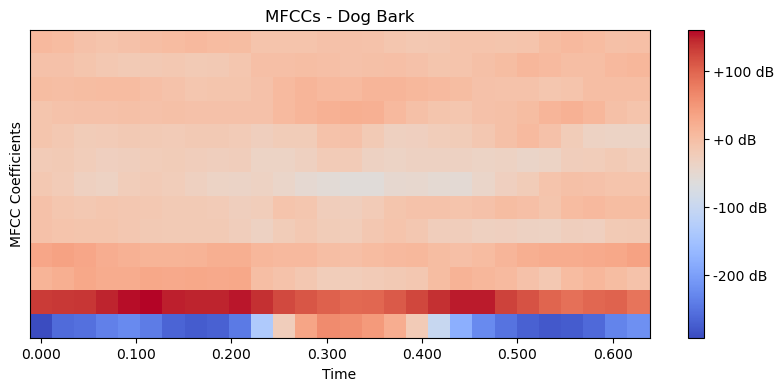

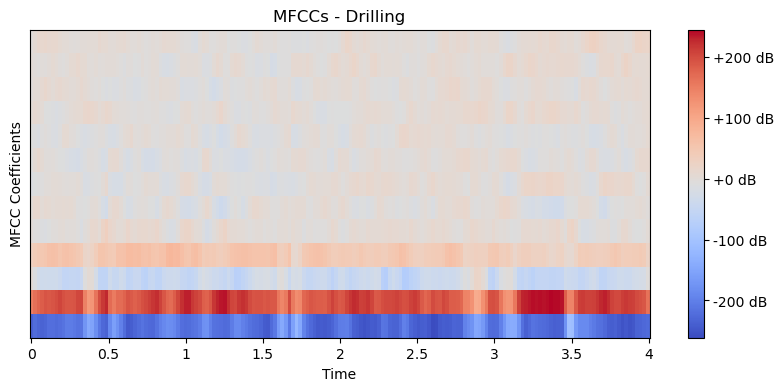

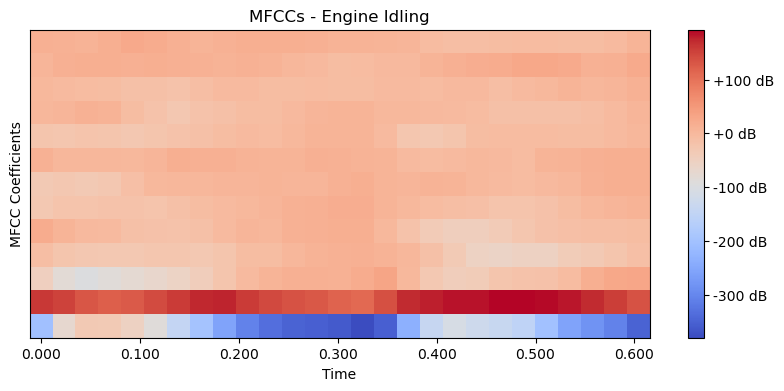

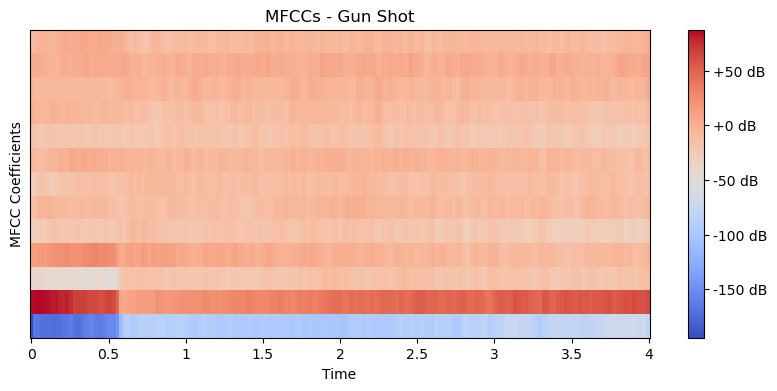

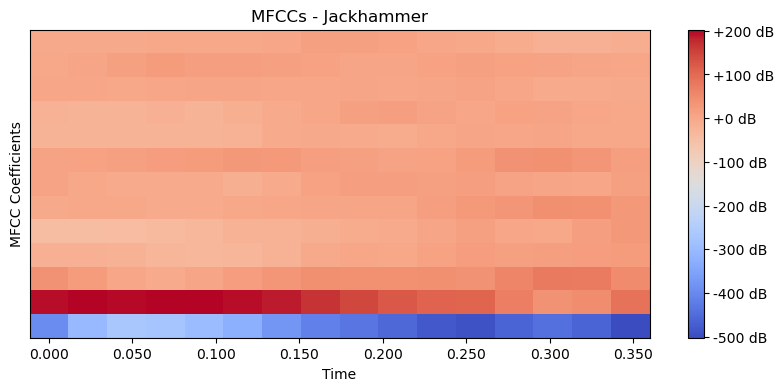

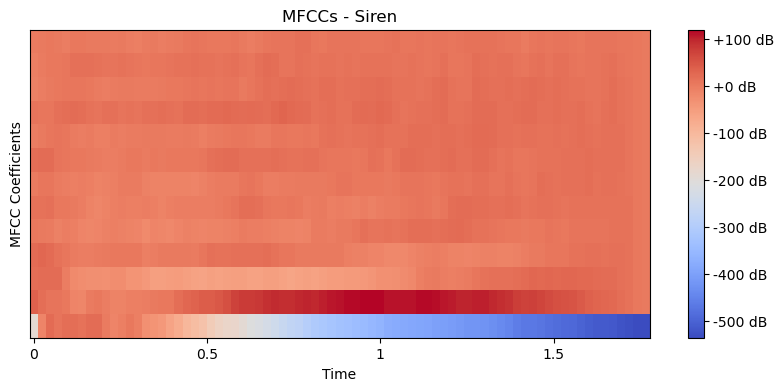

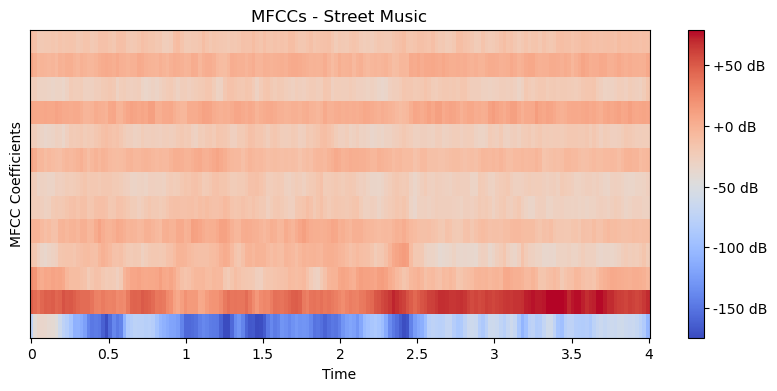

In [41]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Dictionary of sound types and their corresponding audio files
sound_types = {
    'Air Conditioner': f'{PROJECT_ROOT_DIR}/input/audio/fold1/99180-9-0-48.wav',
    'Car Horn': f'{PROJECT_ROOT_DIR}/input/audio/fold2/123688-8-2-2.wav',
    'Children Playing': f'{PROJECT_ROOT_DIR}/input/audio/fold3/6988-5-0-0.wav',
    'Dog Bark': f'{PROJECT_ROOT_DIR}/input/audio/fold4/344-3-0-0.wav',
    'Drilling': f'{PROJECT_ROOT_DIR}/input/audio/fold5/6508-9-0-1.wav',
    'Engine Idling': f'{PROJECT_ROOT_DIR}/input/audio/fold6/4910-3-0-0.wav',
    'Gun Shot': f'{PROJECT_ROOT_DIR}/input/audio/fold7/518-4-0-0.wav',
    'Jackhammer': f'{PROJECT_ROOT_DIR}/input/audio/fold8/4918-3-0-0.wav',
    'Siren': f'{PROJECT_ROOT_DIR}/input/audio/fold9/7063-6-0-0.wav',
    'Street Music': f'{PROJECT_ROOT_DIR}/input/audio/fold10/99192-4-0-53.wav'
}

# Iterate over sound types and compute MFCCs for each
for sound_name, audio_file in sound_types.items():
    # Load the audio file
    audio, sr = librosa.load(audio_file)

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Plot the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCCs - {}'.format(sound_name))
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.show()
